Importing all data analysis modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset using pandas

In [2]:
df = pd.read_csv('AB_US_2023.csv')
df.head()

C:\Users\Joydeep\AppData\Local\Temp\ipykernel_14604\3840595063.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AB_US_2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


The size of the data set and informations about features

In [3]:
df.shape

(232147, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

Finding the missing values

In [5]:
df.isna().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

Percentage of missing values

In [6]:
missing = df.isna().sum()

missing /= df.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Precent Of Missing Values'})
missing

,Precent Of Missing Values
id,0.000000
name,0.006892
host_id,0.000000
host_name,0.005600
neighbourhood_group,58.431511
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


Graphical view to see missing values in data

Text(0.5, 1.0, 'Missing Values Proportion')

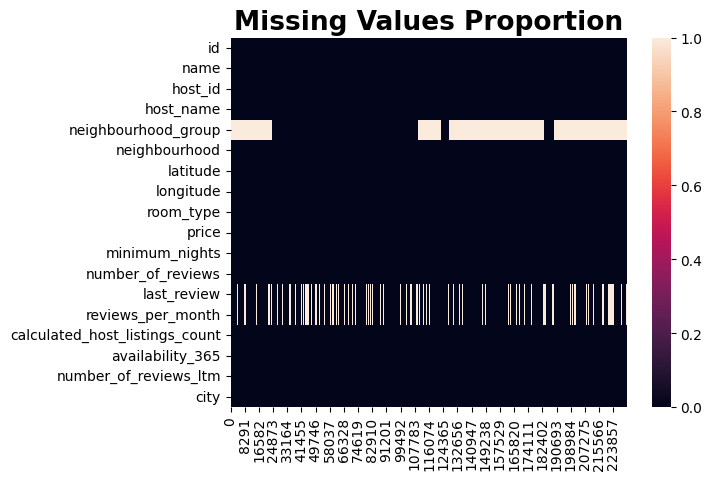

In [7]:
ax = sns.heatmap(df.isna().T)
ax.set_title('Missing Values Proportion',fontsize=19,fontweight='bold')

## Handling the missing values



We can remove the features name and host name, as they are not required for prediction.
As we can see there are many values are missing in 'neighbourhood group' and 'last review', we also drop them


In [8]:
df.drop(['name', 'host_name', 'neighbourhood_group', 'last_review'], axis=1, inplace=True)
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,1169,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2.31,1,128,59,San Francisco
1,5858,8904,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,0.66,1,365,0,San Francisco
2,8142,21994,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,0.09,13,365,1,San Francisco
3,8339,24215,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,0.17,2,365,0,San Francisco
4,8739,7149,Mission,37.76030,-122.42197,Private room,110,1,770,4.65,2,159,34,San Francisco


Now we will see the mean, median and mode of 'reviews per month' and try to fill the missing values.

In [9]:
df['reviews_per_month'].mean()

1.6383475543804833

In [10]:
df['reviews_per_month'].median()

1.0

In [11]:
df['reviews_per_month'].mode()

0    1.0
Name: reviews_per_month, dtype: float64

So we can fill the missing values with 1 as it is the median and mode

In [12]:
df['reviews_per_month'].fillna(0, inplace=True)

Now we have removed all the missing values

In [13]:
df.isna().sum()

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
city                              0
dtype: int64

## Removing the outliers

Removing the outliers is necessary for our model to work properly.
At first we will store the indexes of all numeric features in an index object to analyse them easily.

In [14]:
df_num = df.select_dtypes(include=['int64','float64']).columns

Now we will see the statistical measures of each feature and using matplotlib we will also see the statistical distribution graphically.

In [15]:
desc = df.describe()
desc.loc['skew'] = desc.skew()
desc.loc['kurt'] = desc.kurt()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

desc.drop(columns=['id','host_id'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,232147.00000,232147.00000,232147.00000,232147.00000,232147.00000,232147.00000,232147.00000,232147.00000,232147.00000
mean,36.61058,-98.30144,259.46800,13.49587,40.91523,1.29194,29.87906,180.98569,11.68970
std,5.12652,19.70693,1024.64592,27.92063,80.64915,1.82393,106.01367,134.71530,20.59995
min,25.95732,-123.08913,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25%,33.97622,-118.31511,91.00000,2.00000,1.00000,0.05000,1.00000,52.00000,0.00000
50%,36.19056,-97.72767,149.00000,3.00000,9.00000,0.58000,2.00000,175.00000,3.00000
75%,40.71744,-77.02622,250.00000,30.00000,43.00000,1.99000,10.00000,321.00000,16.00000
max,47.73401,-70.99600,100000.00000,1250.00000,3091.00000,101.42000,1003.00000,365.00000,1314.00000
skew,2.82843,2.82843,2.10853,2.82827,2.82746,2.82843,2.82833,2.82841,2.82825
kurt,9.00000,8.99999,4.96581,8.99928,8.99555,9.00000,8.99954,8.99993,8.99920


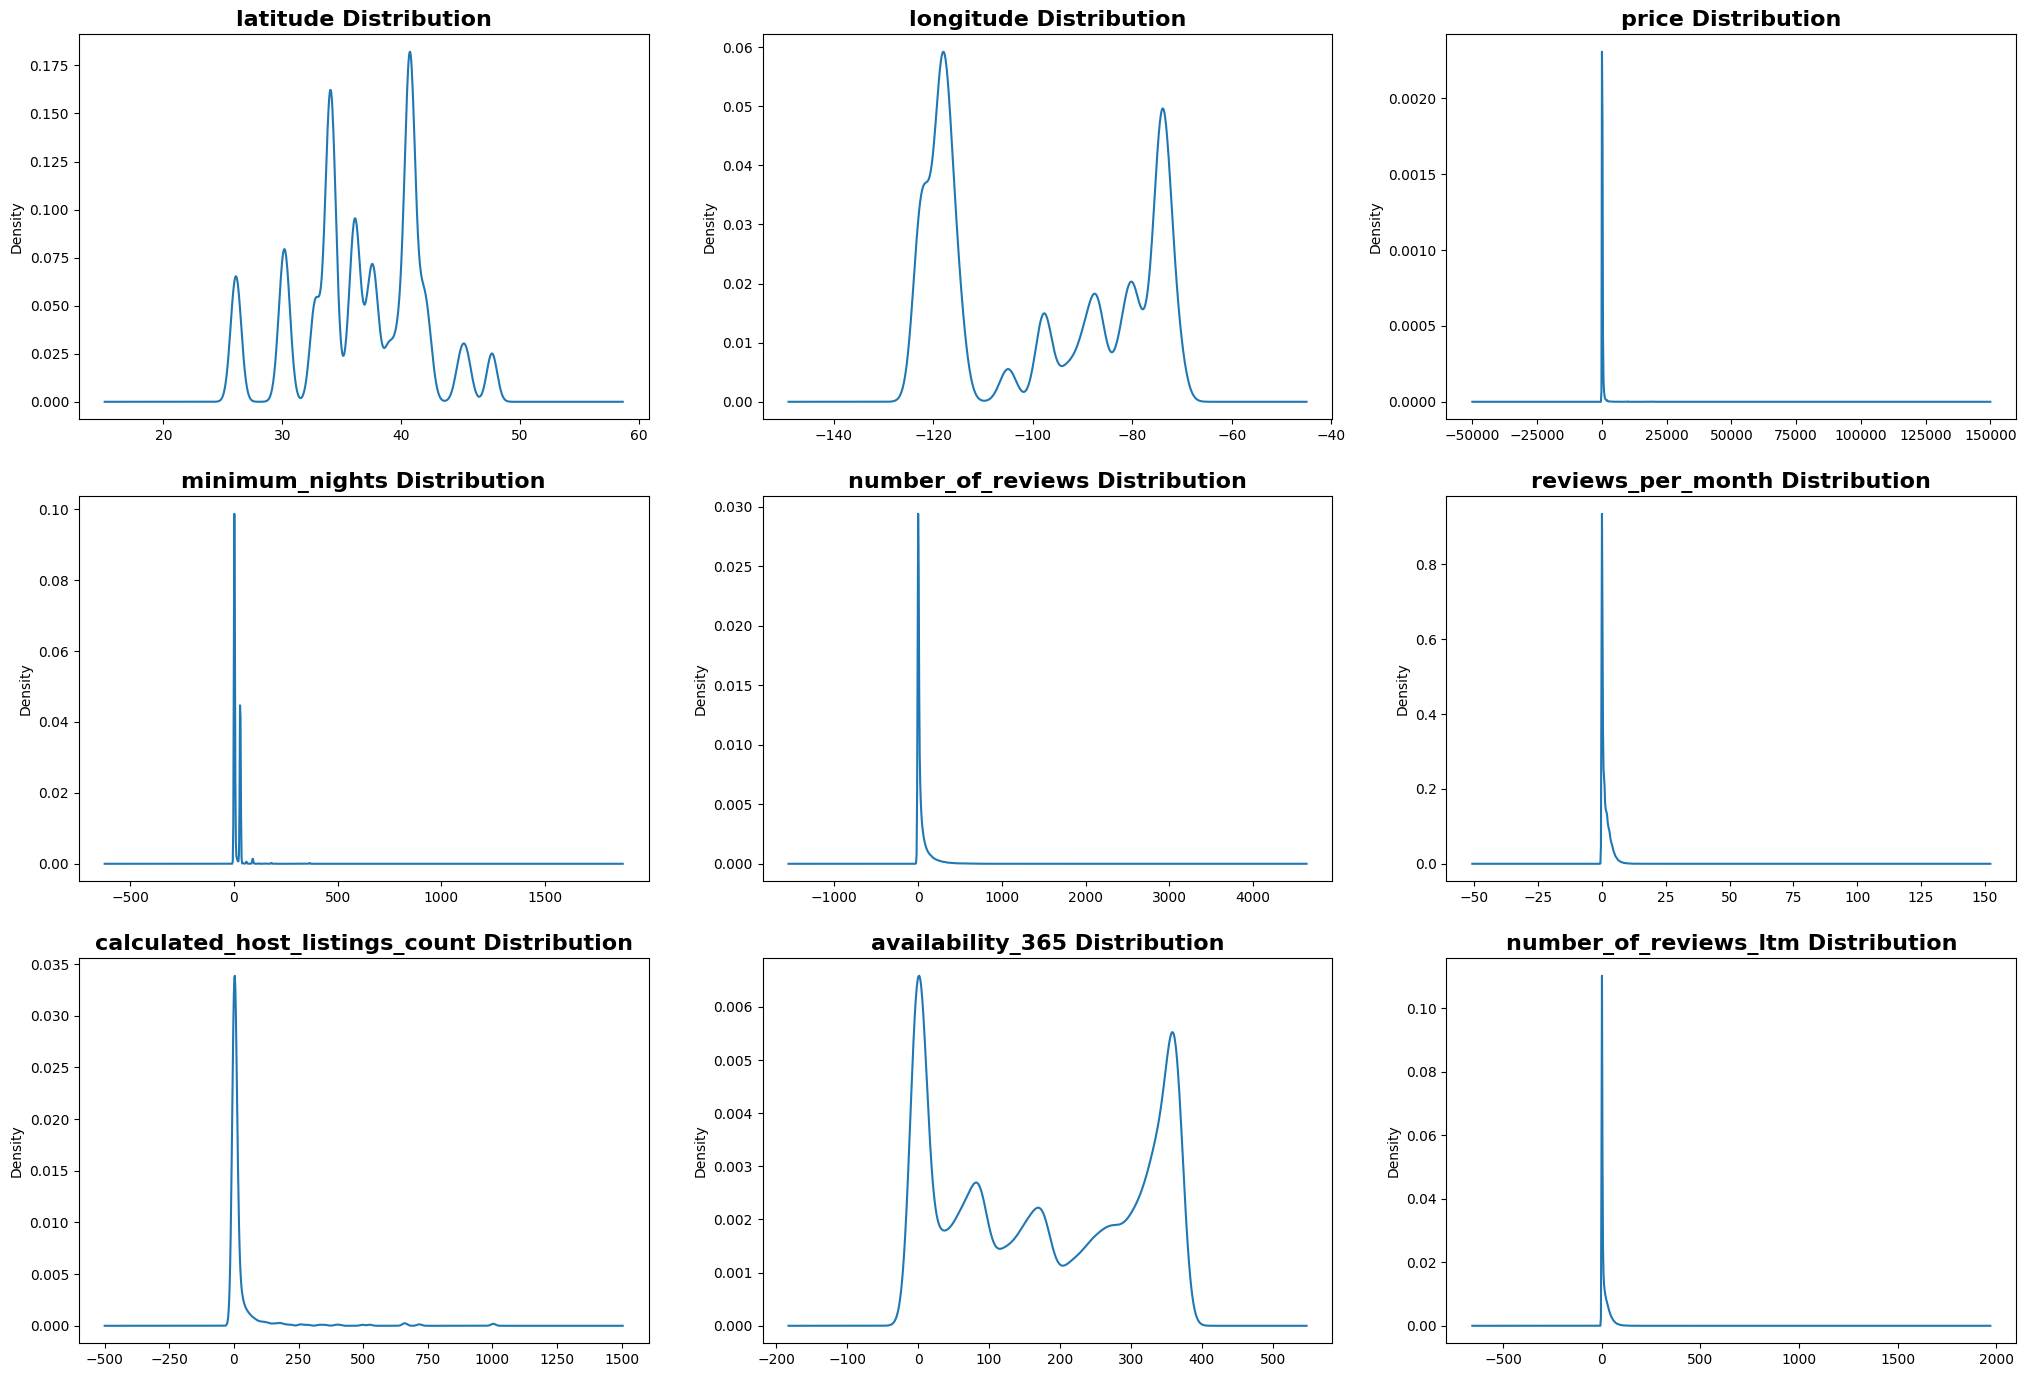

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3)
aux = 2
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        df[df_num[aux]].plot(kind='kde',ax=col)
        col.set_title(df_num[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

After analyzing the statistical data and distribution, we will now remove the outliers carefully, so that we won't lose the significant portion of data.

In [17]:
iqr = df[df['price'].between(0,500)]
iqr = iqr[iqr['minimum_nights'] < 50]
iqr = iqr[iqr['number_of_reviews'] < 300]
iqr = iqr[iqr['calculated_host_listings_count'] < 200]
iqr = iqr[iqr['number_of_reviews_ltm'] < 100]
iqr = iqr[iqr['reviews_per_month']<5]


Now we will visit again the statistical measures and distributions to see the dataset after outlier removal.

In [18]:
desc = iqr.describe()
desc.loc['skew'] = desc.skew()
desc.loc['kurt'] = desc.kurt()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

desc.drop(columns=['id','host_id'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,191512.00000,191512.00000,191512.00000,191512.00000,191512.00000,191512.00000,191512.00000,191512.00000,191512.00000
mean,36.65677,-97.96567,167.18321,11.36653,33.07889,1.11099,12.44920,175.30516,9.82658
std,5.13631,19.71208,105.78400,13.05685,53.31614,1.24663,27.91874,134.94191,14.22857
min,25.95732,-123.08913,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25%,33.97792,-118.28845,89.00000,2.00000,1.00000,0.07000,1.00000,43.00000,0.00000
50%,36.22795,-97.71113,140.00000,3.00000,9.00000,0.61000,2.00000,167.00000,3.00000
75%,40.71771,-77.00522,221.00000,30.00000,40.00000,1.85000,8.00000,316.00000,15.00000
max,47.73401,-70.99600,500.00000,48.00000,299.00000,4.99000,193.00000,365.00000,99.00000
skew,2.82843,2.82842,2.82840,2.82843,2.82842,2.82843,2.82842,2.82841,2.82843
kurt,9.00000,8.99998,8.99986,9.00000,8.99994,9.00000,8.99998,8.99990,8.99999


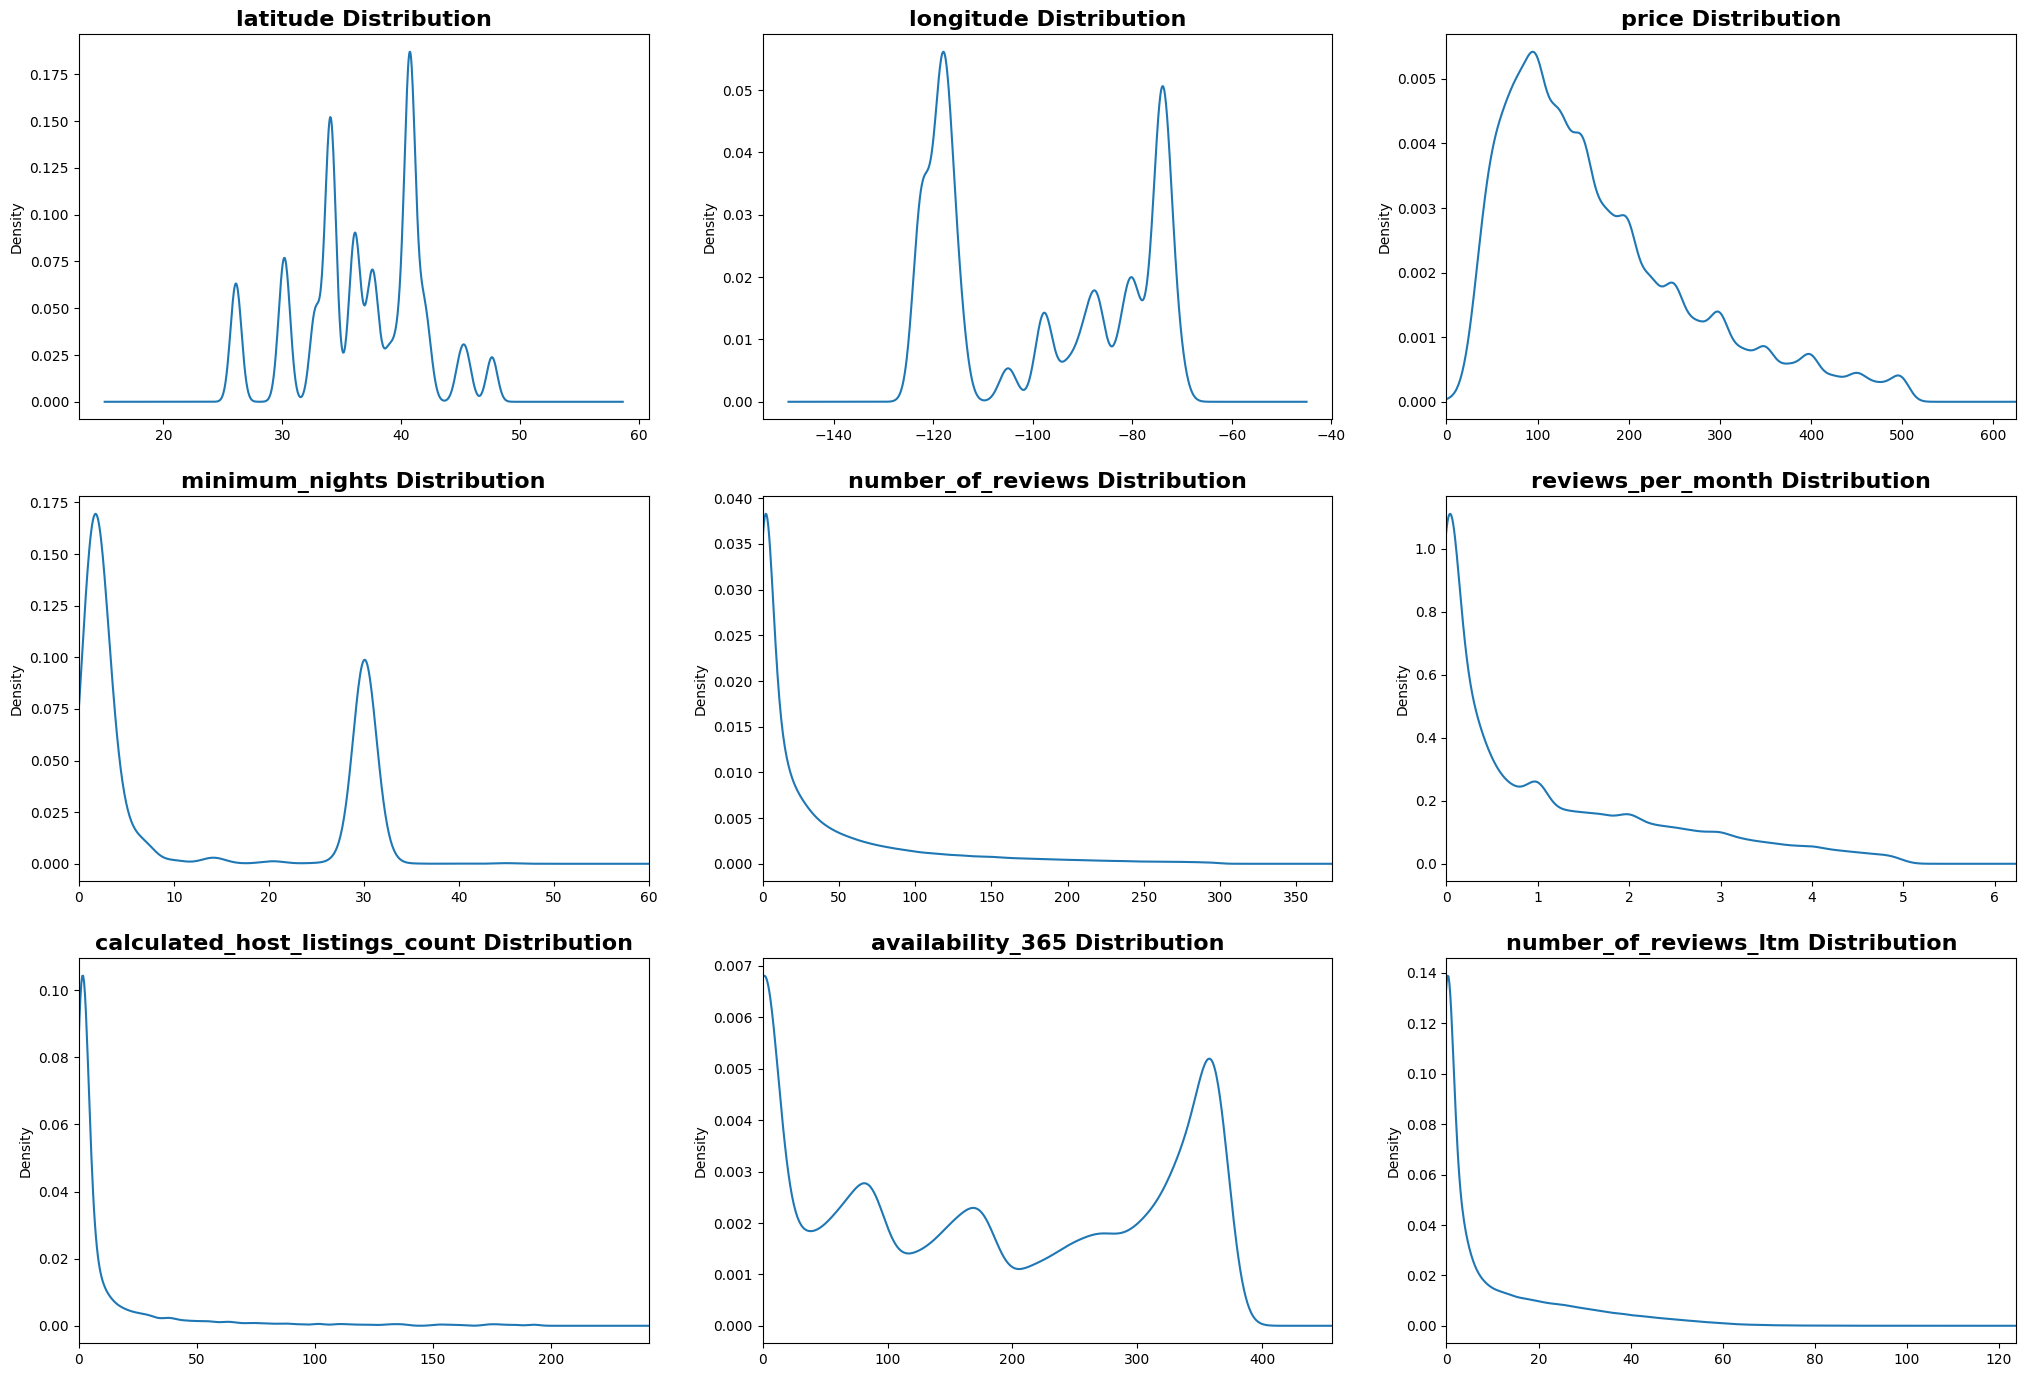

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3)
aux = 2
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        iqr[df_num[aux]].plot(kind='kde',ax=col)
        if df_num[aux] not in ['latitude','longitude']:
            col.set_xlim(0,iqr[df_num[aux]].max()*1.25)
        col.set_title(df_num[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

Now we will see the size of the remaing dataset

In [20]:
iqr.shape

(191512, 14)

## Analyzing the categorial features

We will see distribution of different Room Types in our data

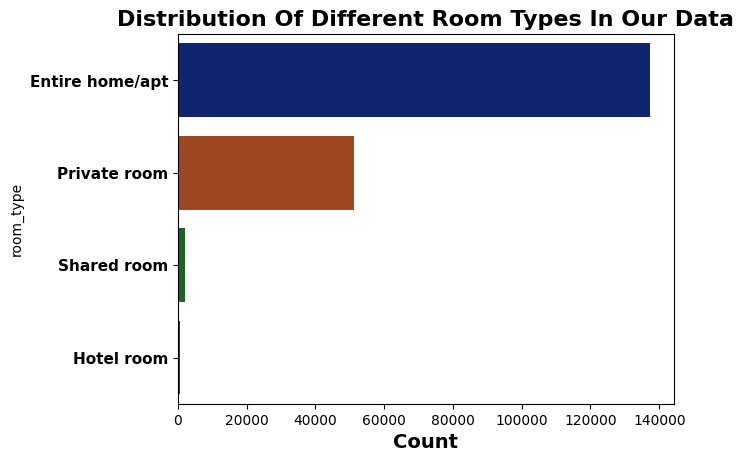

In [21]:
room = sns.countplot(y=iqr['room_type'],order=iqr['room_type'].value_counts().index,palette='dark')
room.set_yticklabels(room.get_yticklabels(),fontsize=11,fontweight='bold')
room.set_title('Distribution Of Different Room Types In Our Data',fontsize=16,fontweight='bold')
room.set_xlabel('Count',fontsize=14,fontweight='bold')

plt.show()

Distribution of different Cities in our data

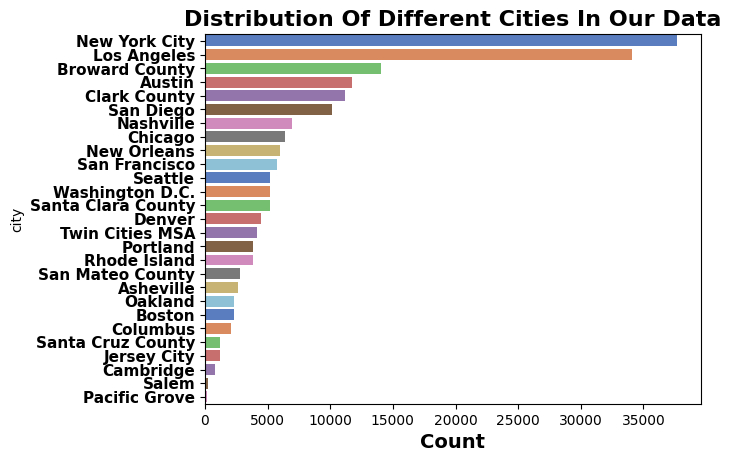

In [22]:
city = sns.countplot(y=iqr['city'],order=iqr['city'].value_counts().index,palette='muted')
city.set_yticklabels(city.get_yticklabels(),fontsize=11,fontweight='bold')
city.set_title('Distribution Of Different Cities In Our Data',fontsize=16,fontweight='bold')
city.set_xlabel('Count',fontsize=14,fontweight='bold')

plt.show()

## Feature Selection

Analysing the data we have selected these features to train our model

- latitude	
- longitude	
- room_type	
- minimum_nights	
- number_of_reviews	
- reviews_per_month	
- availability_365	
- number_of_reviews_ltm	
- city

In [23]:
ndf = iqr.drop(['id','host_id','calculated_host_listings_count','neighbourhood'],axis=1)

In [24]:
ndf = ndf.reindex(columns=['latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm', 'city', 'price'])
ndf.head()

## Feature Engineering

#### Encoding Categorical values

We have encoded room-type and city using Label_Encoder. We need to save them as joblib file to encode user inputs later

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

ndf['room_type'] = label_encoder.fit_transform(ndf['room_type'])
ndf['city'] = label_encoder.fit_transform(ndf['city'])


ndf.head()

,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,city,price
1,37.74474,-122.42089,0,30,111,0.66000,365,0,20,235
2,37.76555,-122.45213,2,32,9,0.09000,365,1,20,56
5,37.71750,-122.39698,2,1,19,0.12000,365,1,20,95
6,37.78440,-122.47932,0,5,234,1.69000,32,13,20,259
7,37.74766,-122.42041,2,30,80,0.74000,331,1,20,100


#### Feature Scaling

We will standerdize all values using standerd scaler. Here also we will save the Scaler object using joblib to scale user inputs.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ndf)
ndf = pd.DataFrame(scaled_features, index=ndf.index, columns=ndf.columns)


ndf.head()

,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,city,price
1,0.21182,-1.24062,-0.62234,1.42711,1.46150,-0.36177,1.40576,-0.69063,1.23855,0.64109
2,0.21587,-1.24221,1.54951,1.58028,-0.45163,-0.81900,1.40576,-0.62034,1.23855,-1.05104
5,0.20652,-1.23941,1.54951,-0.79396,-0.26407,-0.79494,1.40576,-0.62034,1.23855,-0.68237
6,0.21954,-1.24359,-0.62234,-0.48760,3.76850,0.46446,-1.06198,0.22303,1.23855,0.86797
7,0.21239,-1.24060,1.54951,1.42711,0.88006,-0.29760,1.15379,-0.62034,1.23855,-0.63510


#### Correlation among all features

<Axes: >

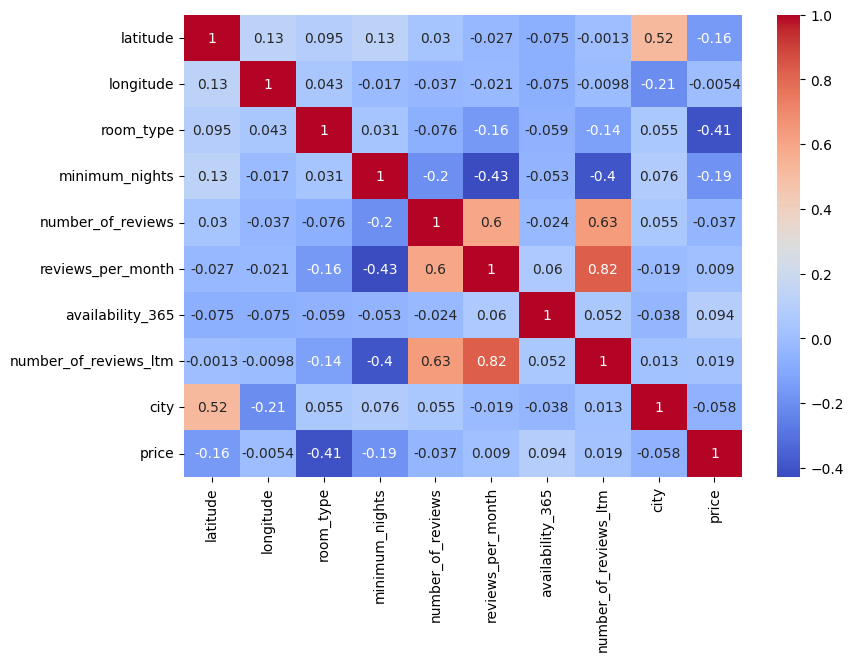

In [27]:
plt.figure(figsize=(9,6))
sns.heatmap(ndf.corr(),annot=True,cmap='coolwarm')

## Splitting Training and Test data

In [28]:
from sklearn.model_selection import train_test_split
X = ndf.drop('price',axis=1)
y = ndf['price']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state=42)

## Importing performance metrics calculator modules

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve
import math

## Linear Regression

MSE 0.761365864772448
RMSE 0.8725628142274046
R2 Score 0.2391465749801307


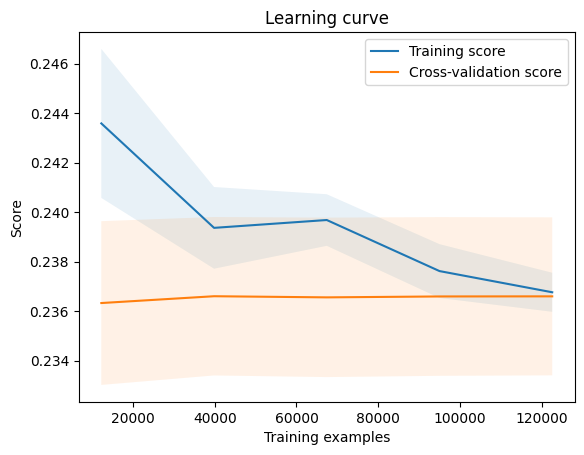

In [36]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred_linreg = linReg.predict(X_test)
print('MSE',mean_squared_error(y_test, y_pred_linreg))
print('RMSE',math.sqrt(mean_squared_error(y_test, y_pred_linreg)))
print('R2 Score',r2_score(y_test, y_pred_linreg))

train_sizes, train_scores, test_scores = learning_curve(linReg, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()


## Ridge Regression

MSE 0.7613658839600563
RMSE 0.8725628252223769
R2 Score 0.23914655580543676


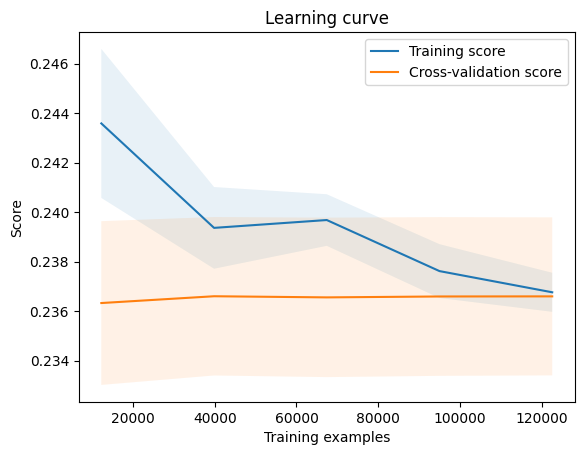

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('MSE',mean_squared_error(y_test, y_pred))
print('RMSE',math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score',r2_score(y_test, y_pred))

train_sizes, train_scores, test_scores = learning_curve(ridge, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

## Gradient Boosting

MSE 0.6738924618071855
RMSE 0.8209095332661118
R2 Score 0.32656110368920876


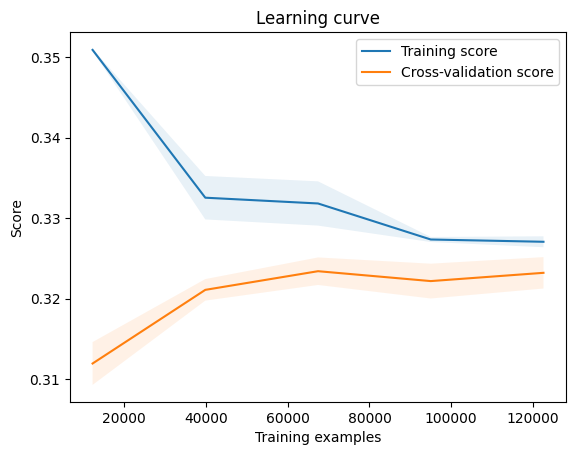

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
grdb = GradientBoostingRegressor(n_estimators=100, random_state=42)
grdb.fit(X_train, y_train)
y_pred = grdb.predict(X_test)
print('MSE',mean_squared_error(y_test, y_pred))
print('RMSE',math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score',r2_score(y_test, y_pred))

train_sizes, train_scores, test_scores = learning_curve(grdb, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

## Random Forest

MSE 0.5669968351405384
RMSE 0.7529919223607504
R2 Score 0.4333847839093242


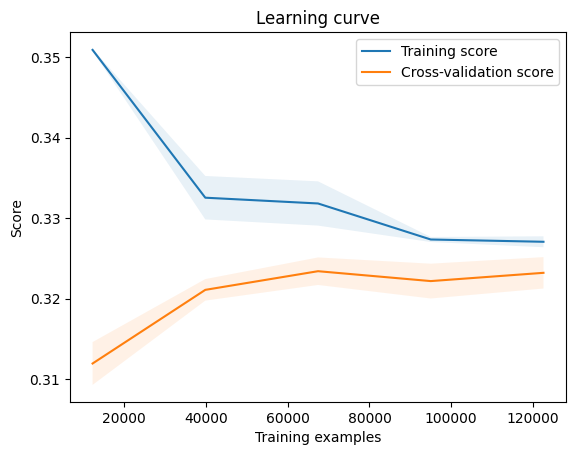

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('MSE',mean_squared_error(y_test, y_pred))
print('RMSE',math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score',r2_score(y_test, y_pred))

train_sizes, train_scores, test_scores = learning_curve(grdb, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

## Hyperparameter Tuning and Cross valiadation

In [85]:
'''
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000], 
    'max_depth': [5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('MSE',mean_squared_error(y_test, y_pred))
print('RMSE',math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score',r2_score(y_test, y_pred))

'''

Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
MSE  0.5606567950176726
RMSE  0.7487701883873801
R2 Score  0.43972055684772304


## Saving the model

In [76]:
import joblib
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(rf, 'model.joblib')

['model.joblib']